In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [2]:
series = pd.read_csv(
    './data/daily-minimum-temperatures.csv',
    header=0,
    index_col=0,
    parse_dates=True,
    squeeze=True)

In [3]:
series.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

## Line Plot

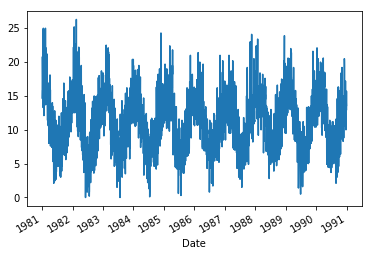

In [4]:
series.plot()
plt.show()

##  Dot Line Plot

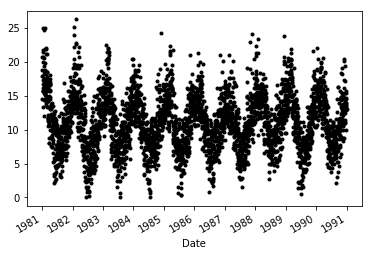

In [5]:
series.plot(style='k.')
plt.show()

## Stacked line plots

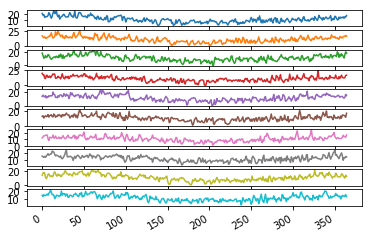

In [6]:
# Grouped by years
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values

years.plot(subplots=True, legend=False)
plt.show()

## Histogram

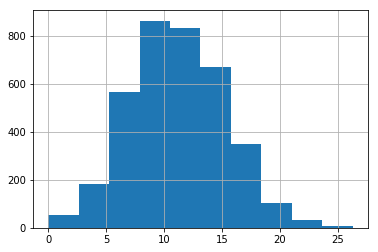

In [7]:
series.hist()
plt.show()

## Density plot

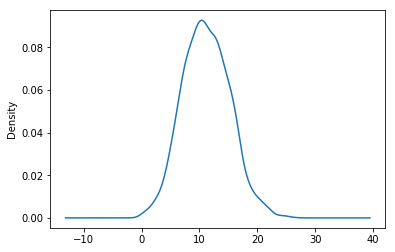

In [8]:
series.plot(kind='kde')
plt.show()

## Box and Whisker Plots
- The Box contains around 25-75th percentiles(capture middle 50% of observations)
- A line is drawn at 50th percentile(median)
- Whiskers(above and below of the box) summarize the general extents of the observations
- Dots outside the whiskers = outliers

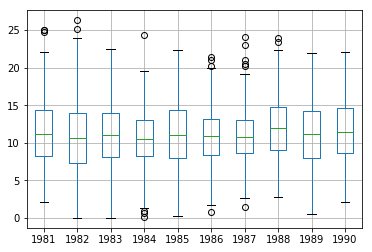

In [9]:
# Group by years
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values
    
years.boxplot()
plt.show()

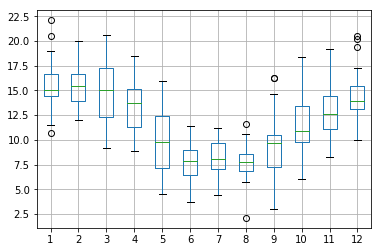

In [10]:
# Group by months in yr = 1990
one_year = series['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))

months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)

months.boxplot()
plt.show()

## Heat Maps
- orange - yellow - red = high values
- blue = low values

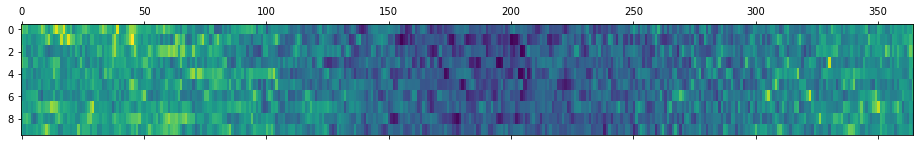

In [11]:
# Group by years
# - rows = years
# - cols =  days
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values
    
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')
plt.show()

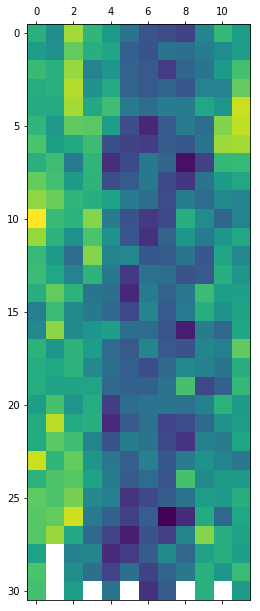

In [12]:
# Group by months in yr = 1990
# - Rows = days
# - Cols = months
one_year = series['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))

months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)

plt.matshow(months, interpolation=None, aspect='auto')
plt.show()

## Lag Scatter Plots
- Time series modeling assumes a relationship between an observation and the previous observation
- Previous observations in a time series are called lags
     + observation at the previous time step called lag1
     + the observation at two time steps ago lag2
- Lag plot:  plots the observation at time (t) on the x-axis and the observation at the next time step (t+1) on the y-axis.
    + Positive correlation: /
    + Negative correlation: \
    + More points stick to the line: strong relationship
    + Less points stick to the line: weak relationship

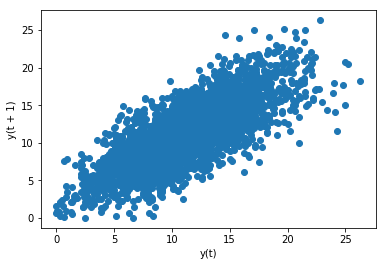

In [13]:
# Corelation with lag1
from pandas.plotting import lag_plot

lag_plot(series)
plt.show()

In [14]:
# Multiple lagplot
values = pd.DataFrame(series.values)
lags = 7

columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
    
df = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
df.columns = columns

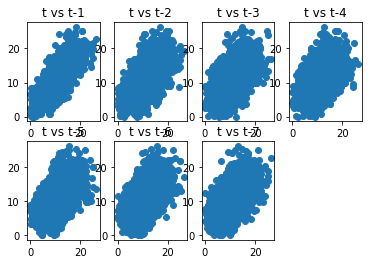

In [15]:
plt.figure(1)
for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=df['t'].values, y=df['t-'+str(i)].values)
plt.show()

## Autocorrelation Plots
- Autocorrelation(self-correlation) = correlation when calculated against lag values in time series
- A correlation value calculated between two groups of numbers, such as observations and their lag1,lag2,lag3,... values, results in a number between -1 and 1
    + 1: strong positive correlation
    + -1: strong negative correlation
    + 0: No relation

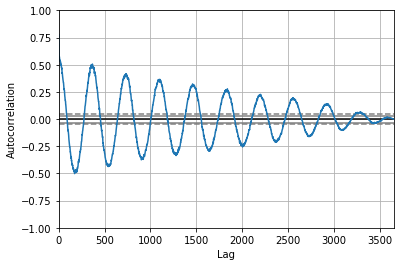

In [16]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
plt.show()